#HOTEL BOOKING DEMAND PREDICTION MODEL

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import datetime
from sklearn import tree
import folium
from folium.plugins import HeatMap
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from boruta import BorutaPy

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('hotel_bookings.csv')

Null Data Cleaning and Processing

In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data["agent"].fillna(0, inplace = True)
data["company"].fillna(0, inplace = True)

In [ ]:
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [ ]:
data.duplicated().sum()

31994

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Removing all data where children and adults and babies are all 0
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data = data[~filter]

In [ ]:
data_columns = [col for col in data.columns if data[col].dtype == 'object']
data_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
data.children.fillna(value=0.0, inplace=True)
imp = SimpleImputer(strategy="most_frequent")
data['country'] = imp.fit_transform(data['country'].values.reshape(-1, 1))

In [ ]:
data_categorical = data[data_columns]
data_categorical

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


Outlier Detection and Removal

<Axes: >

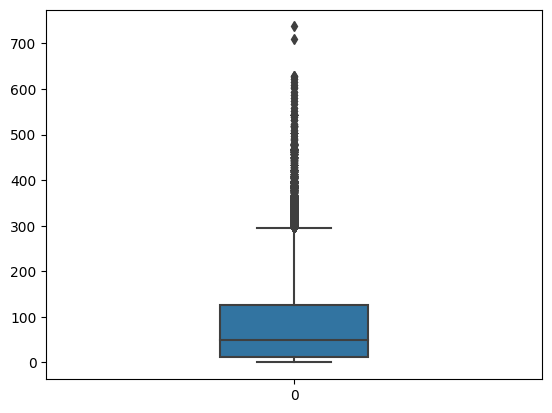

In [ ]:
# Box Plot for outliers for lead time
sns.boxplot(data = data['lead_time'], width = 0.3)

<Axes: xlabel='lead_time', ylabel='hotel'>

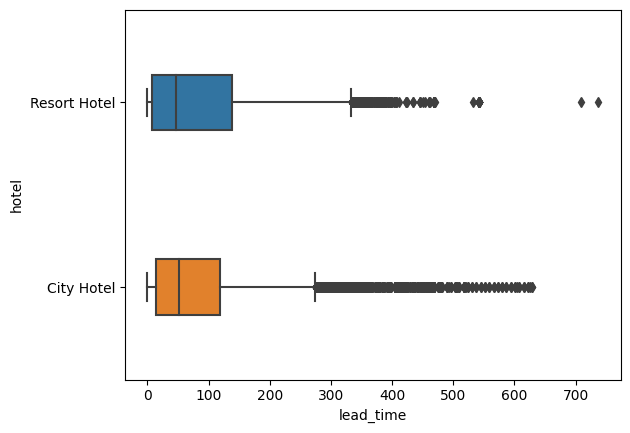

In [ ]:
# Box Plot for outliers for lead time for type of hotel
import seaborn as sns
sns.boxplot(x = data['lead_time'], y = data['hotel'], width = 0.3)

In [ ]:
#Outlier detection
Q1,Q3 = np.percentile(data['lead_time'] , [25,75])
IQR = Q3 - Q1
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5 * IQR
print("Upper Limit: ", ul)
print("Lower Limit: ", ll)

outliers = data[(data['lead_time'] > ul) | (data['lead_time'] < ll)]
outliers

Upper Limit:  296.0
Lower Limit:  -160.0


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,...,No Deposit,40.0,0.0,0,Contract,55.68,0,0,Canceled,2015-05-19
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,...,No Deposit,40.0,0.0,0,Contract,55.68,0,0,Check-Out,2015-07-13
85,Resort Hotel,0,324,2015,July,27,3,4,10,2,...,No Deposit,40.0,0.0,0,Contract,134.73,0,0,Check-Out,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119148,City Hotel,0,457,2017,August,34,25,2,3,2,...,No Deposit,6.0,0.0,0,Transient-Party,122.40,0,1,Check-Out,2017-08-30
119228,City Hotel,0,341,2017,August,35,27,2,3,2,...,No Deposit,22.0,0.0,0,Transient,96.91,0,1,Check-Out,2017-09-01
119296,City Hotel,0,303,2017,August,35,29,0,4,1,...,No Deposit,9.0,0.0,0,Transient,102.38,0,2,Check-Out,2017-09-02
119297,City Hotel,0,332,2017,August,35,31,0,2,2,...,No Deposit,9.0,0.0,0,Transient,170.80,0,2,Check-Out,2017-09-02


In [ ]:
#Outlier removal
data_wo_outliers = data[(data['lead_time'] < ul)]
data = data_wo_outliers

Visualisation

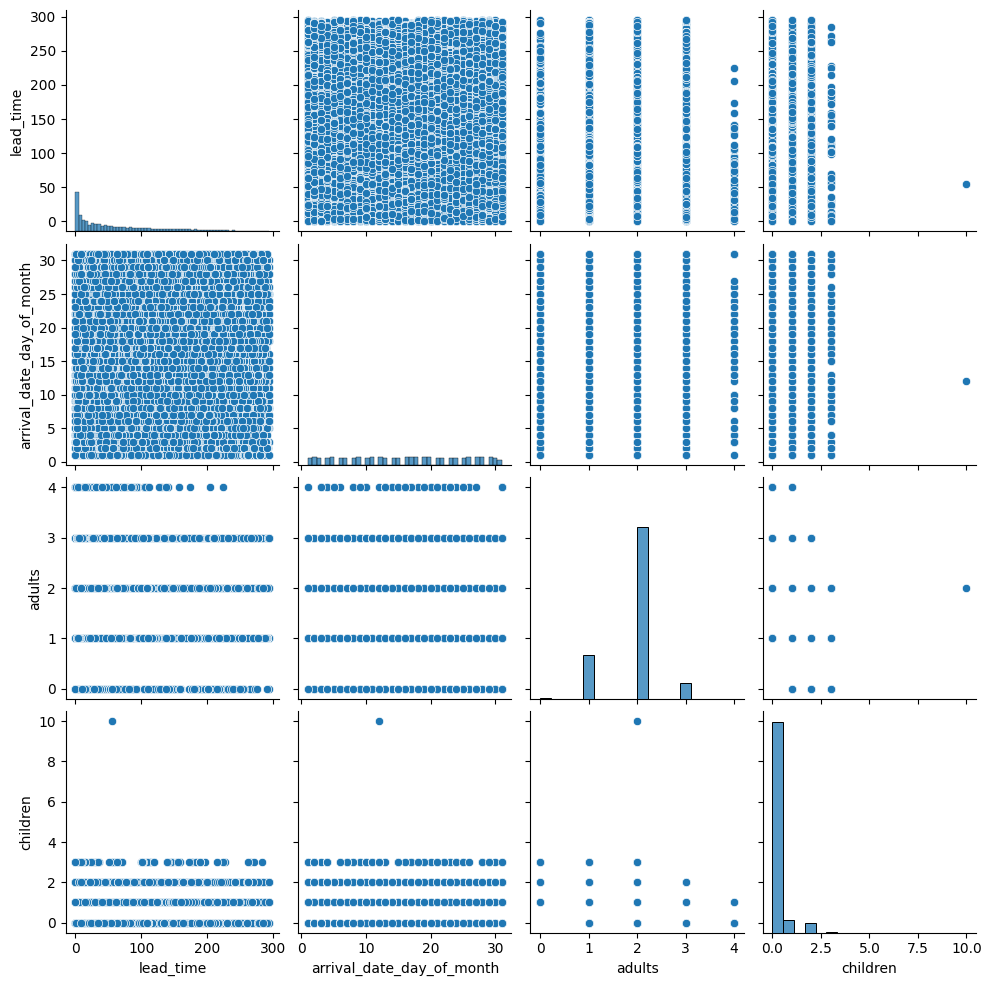

In [ ]:
#PairPlot
sns.pairplot(data, vars = ['lead_time','arrival_date_day_of_month', 'adults', 'children'])

In [ ]:
#Creating Arrival Date which is used i  prediction as well as visualisation
data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
cols=["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]
data['arrival_date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [ ]:
#Dividing the city hotel and resort hotel data
data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

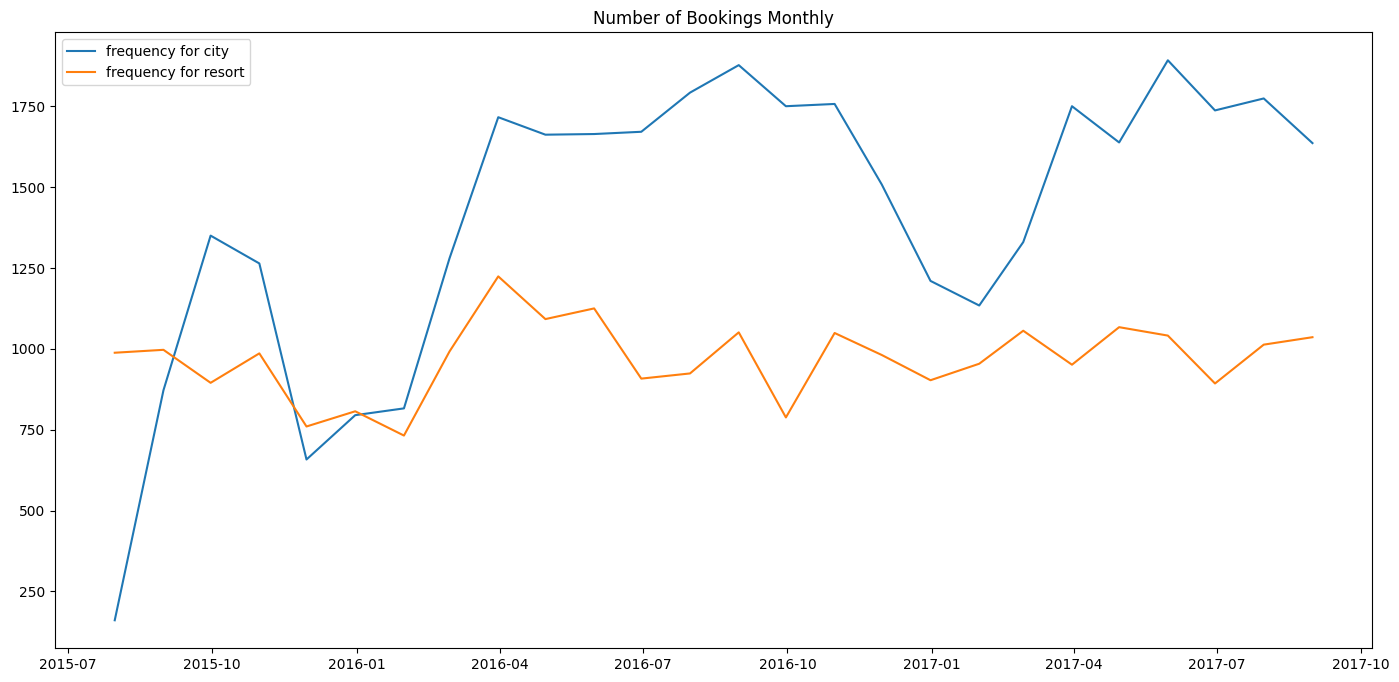

In [ ]:
#Plotting number of bookings monthly for city and resort hotel
dataResortMonthly = data_resort['arrival_date'].value_counts()
dataResortMonthly = dataResortMonthly.resample('m').sum().to_frame().reset_index()

dataCityMonthly = data_city['arrival_date'].value_counts()
dataCityMonthly = dataCityMonthly.resample('m').sum().to_frame().reset_index()


plt.figure(figsize = (17, 8))
plt.plot(dataCityMonthly["index"], dataCityMonthly["arrival_date"], label = "frequency for city")
plt.plot(dataResortMonthly["index"], dataResortMonthly["arrival_date"], label = "frequency for resort")
plt.title("Number of Bookings Monthly")
plt.legend()
plt.show()

In [ ]:
prediction_data = data.copy()
data.drop(["arrival_date"], axis=1, inplace=True)

In [ ]:
#Country Heatmap for showing which location guests are from
country_freq = data['country'].value_counts().to_frame()
country_freq.columns = ['count']

fig = px.choropleth(country_freq, color='count',locations=country_freq.index, hover_name=country_freq.index, color_continuous_scale=px.colors.sequential.Teal)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

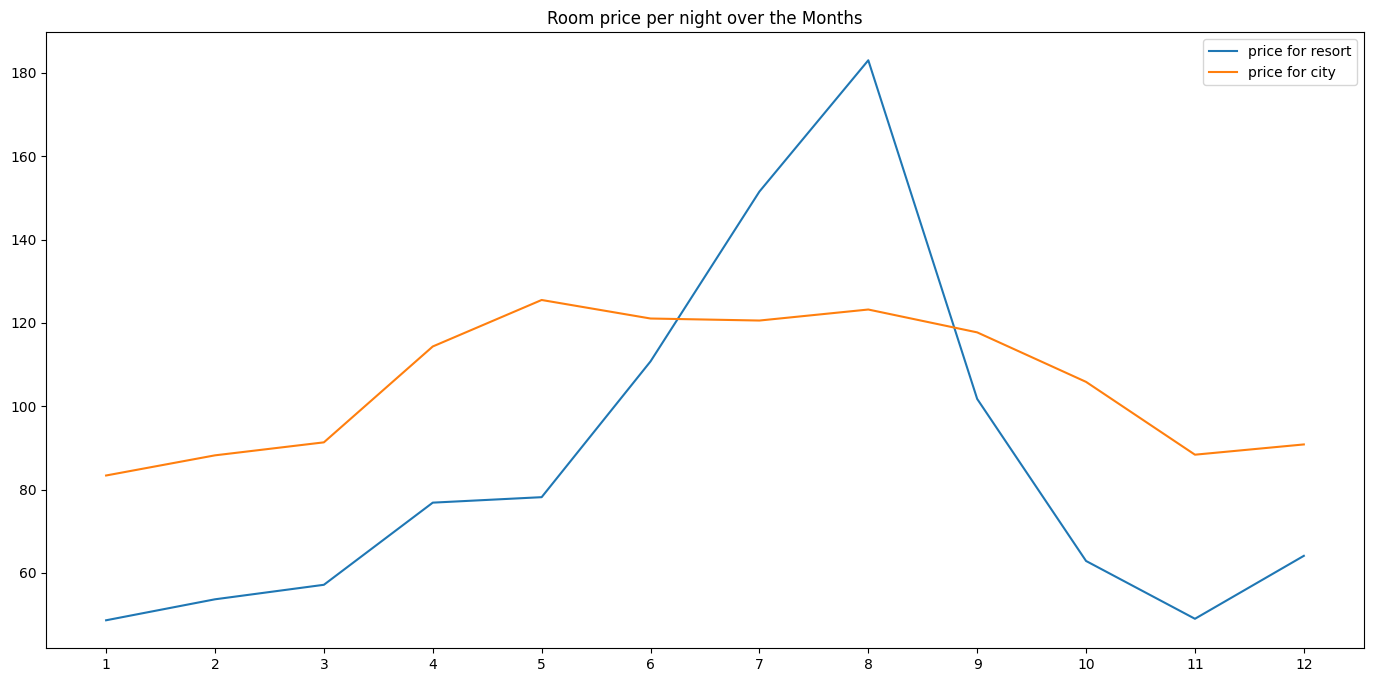

In [ ]:
#Plotting Room price per night over the months
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

plt.figure(figsize = (17, 8))

plt.plot(final_hotel["month"], final_hotel["price_for_resort"], label = "price for resort")
plt.plot(final_hotel["month"], final_hotel["price_for_city_hotel"], label = "price for city")
plt.title("Room price per night over the Months")
plt.legend()
plt.xticks(final_hotel["month"])
plt.show()

In [ ]:
#selecting categorical data
useless_col = ['days_in_waiting_list', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
data.drop(useless_col, axis = 1, inplace = True, errors="ignore")

categorical = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric = [feature for feature in data.columns if data[feature].dtype != 'O']

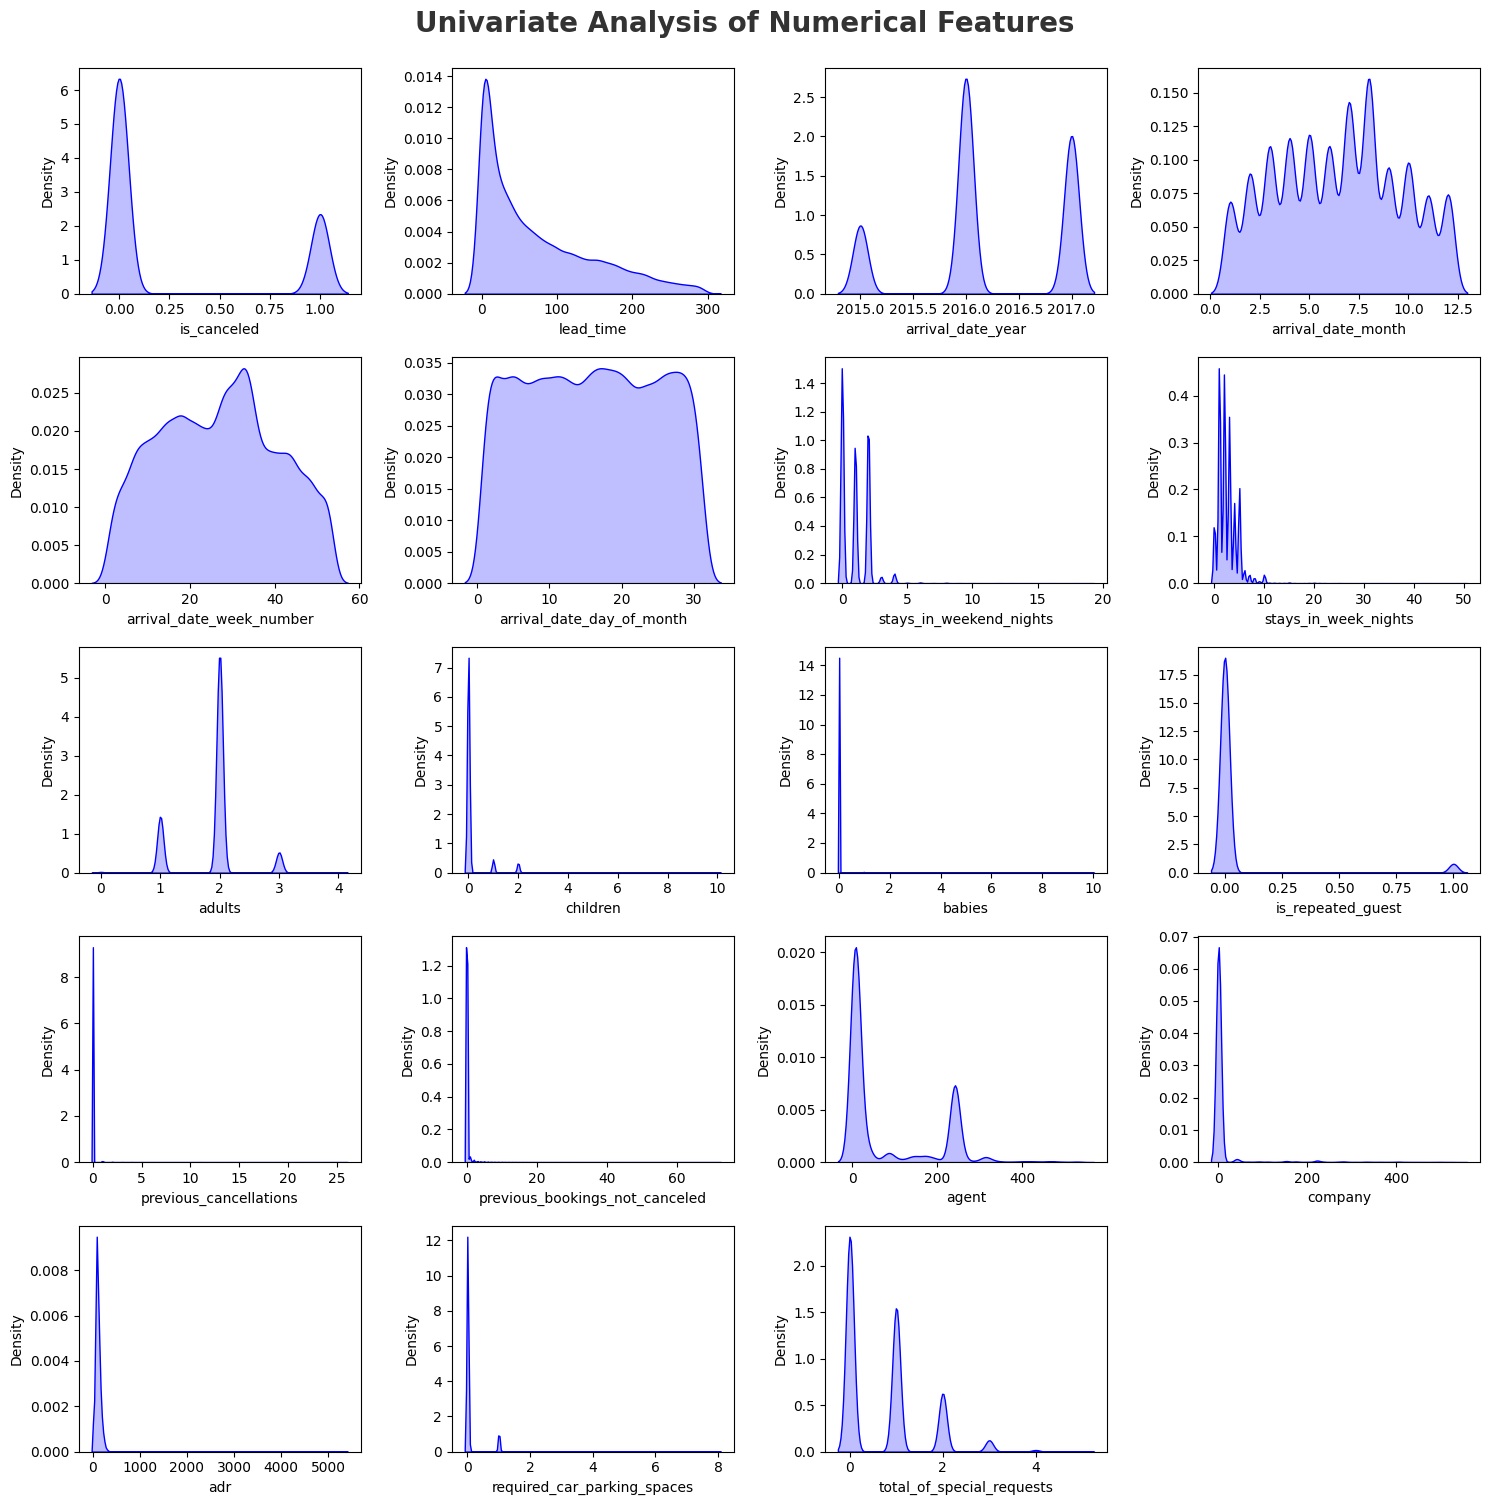

In [ ]:
#Plotting Univariate Analysis of Numerical Features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=data[numeric[i]],fill=True, color='b')
    plt.xlabel(numeric[i])
    plt.tight_layout()

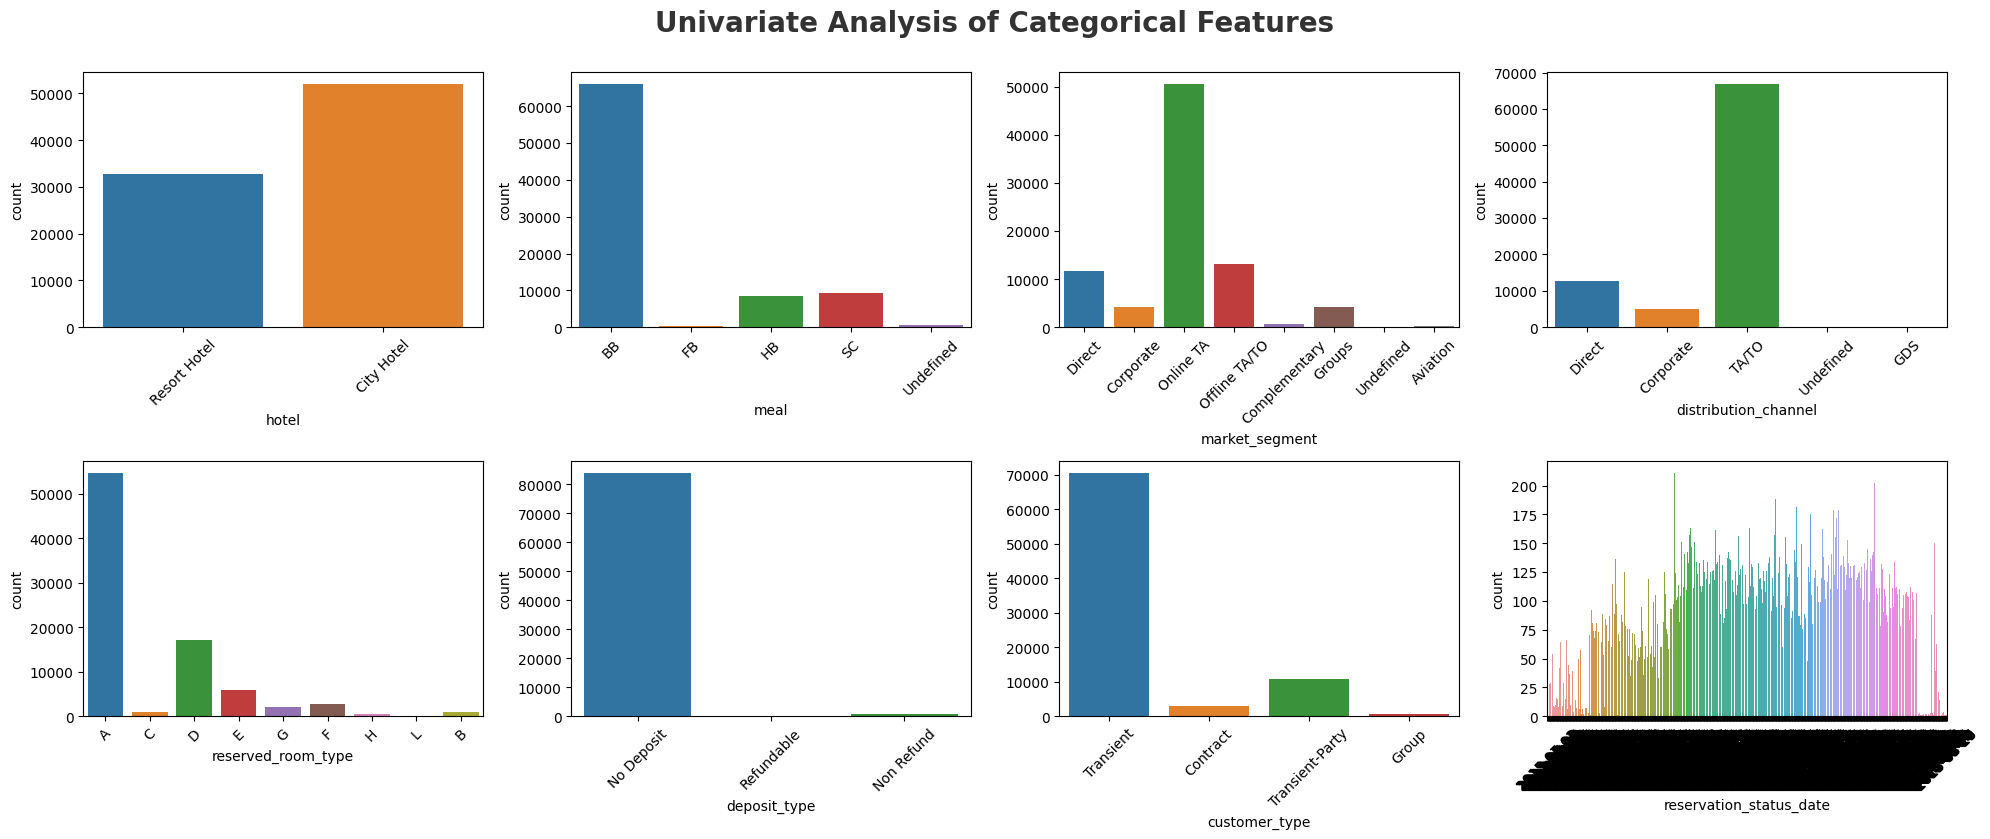

In [ ]:
#Plotting Univariate Analysis of Categorical Features
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=data[categorical[i]])
    plt.xlabel(categorical[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

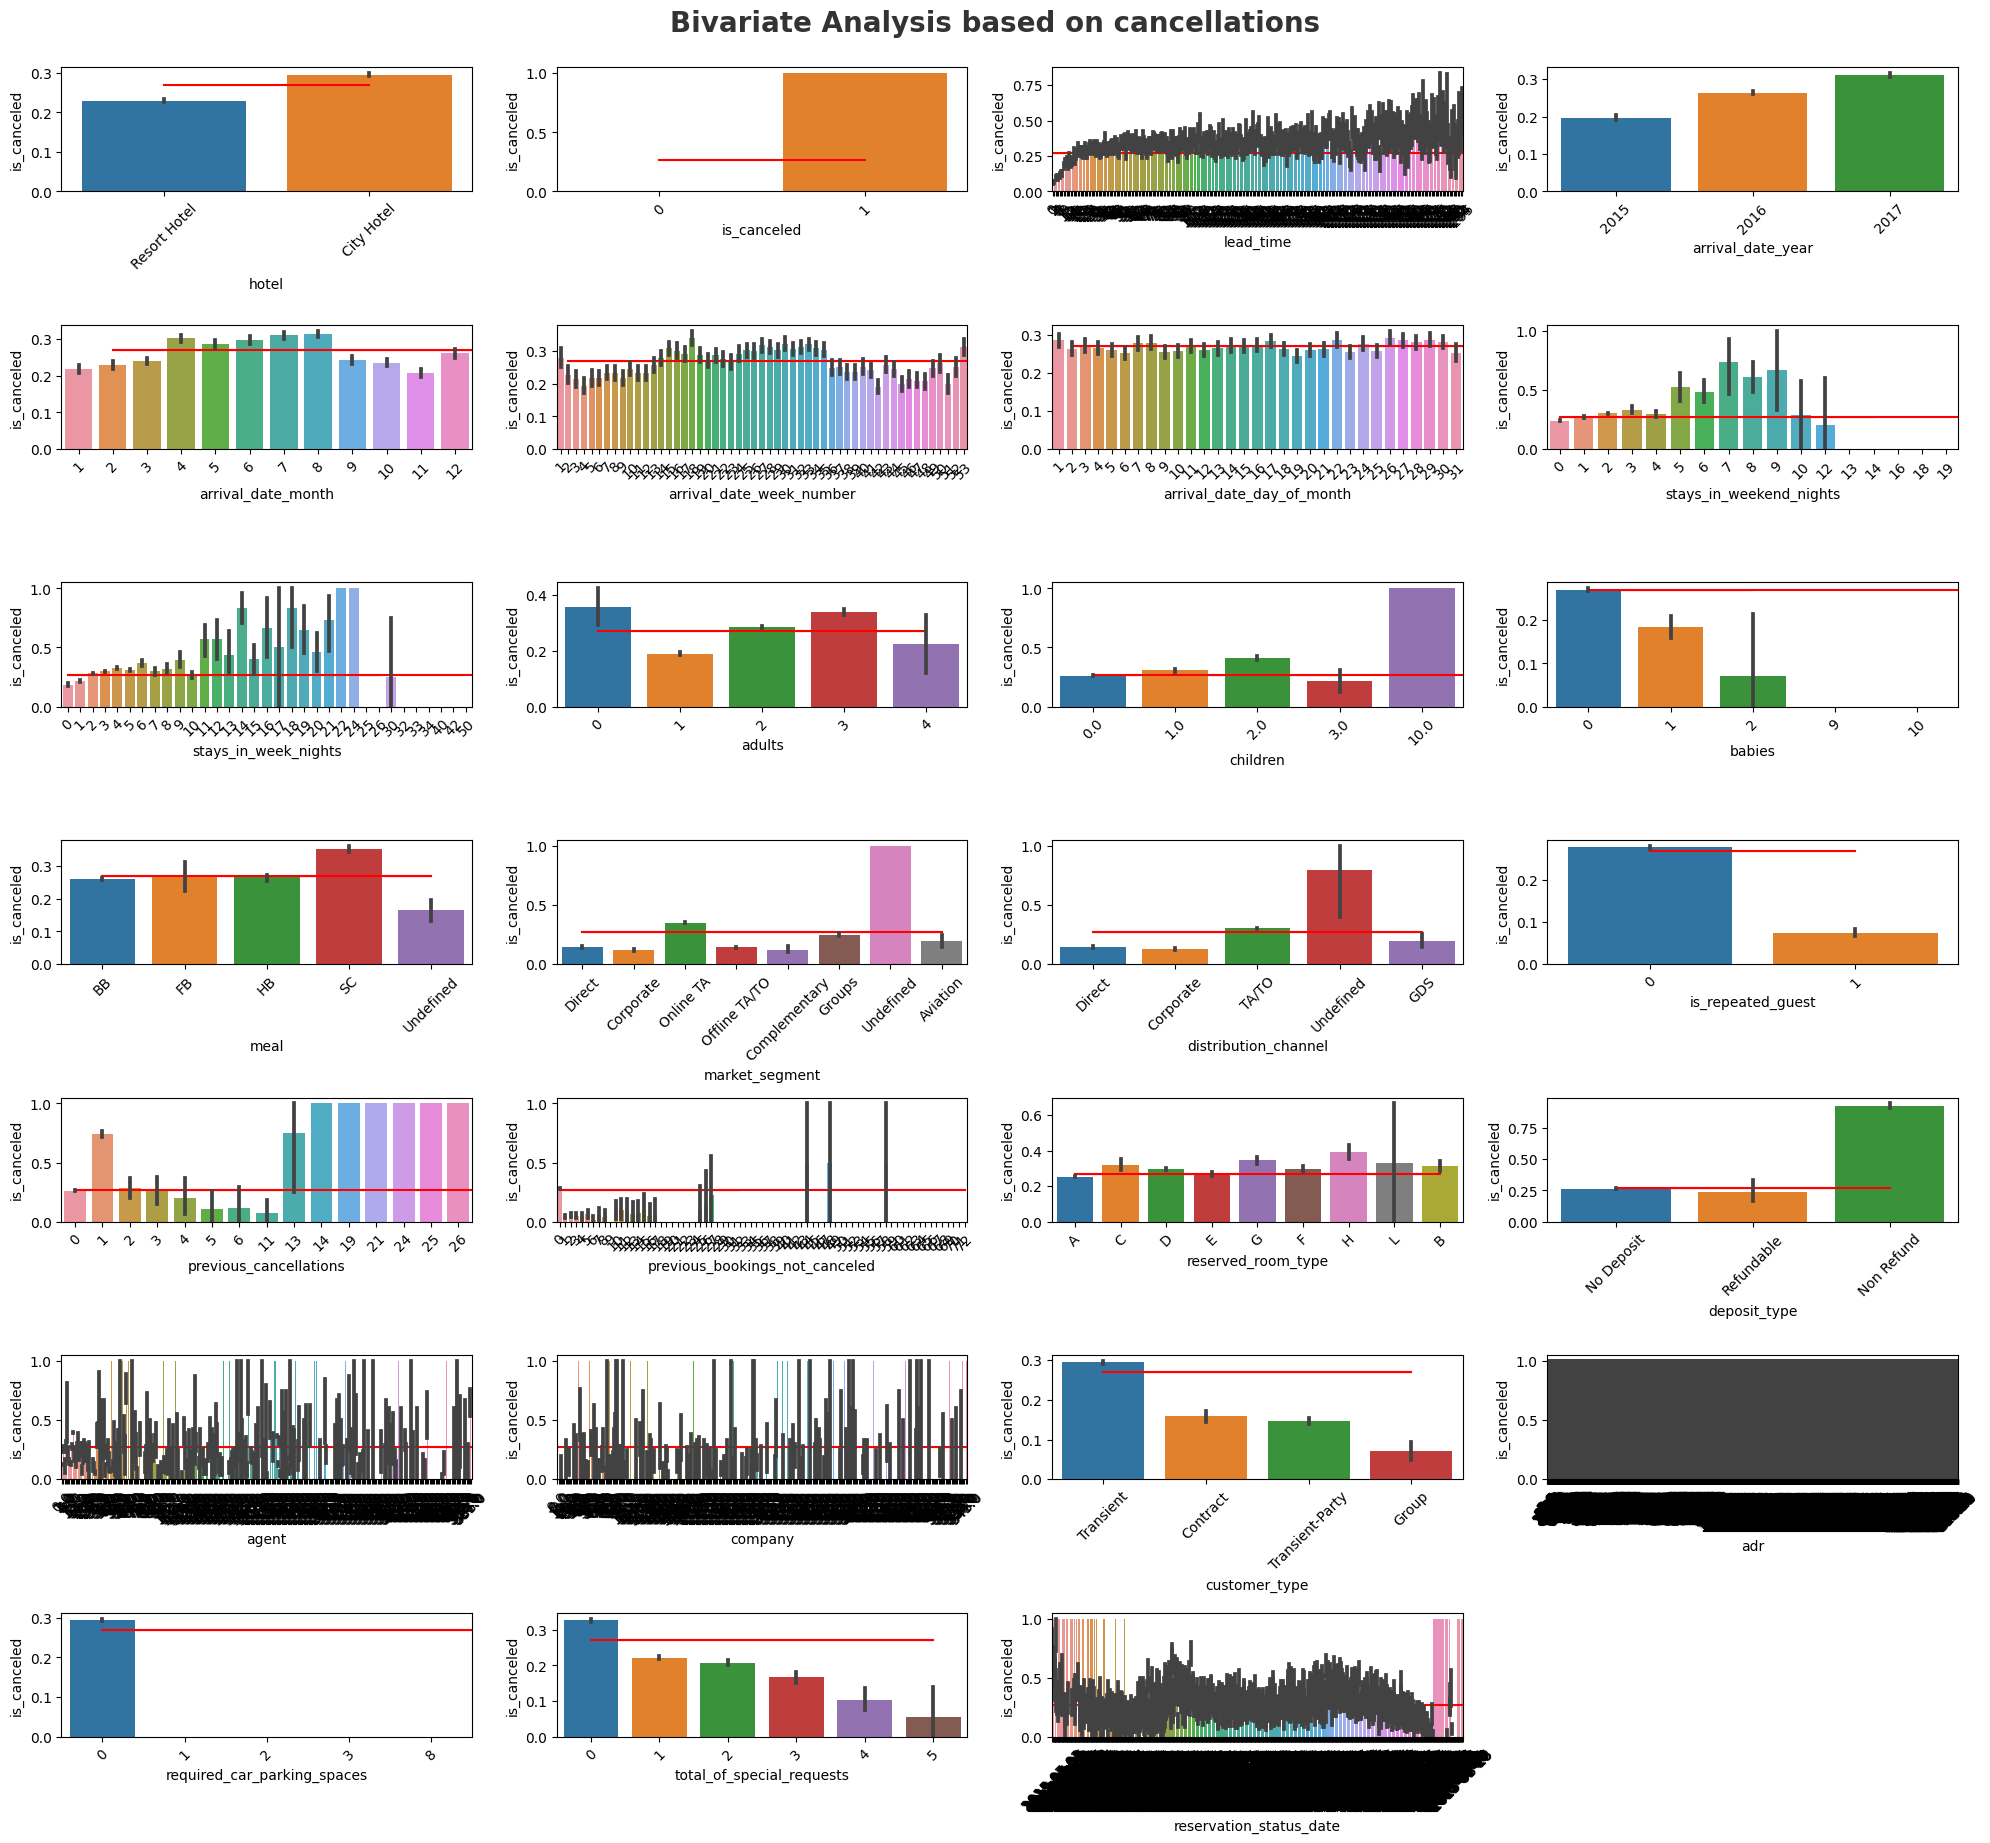

In [ ]:
#Plotting Bivariate Analysis based on cancellations
plt.figure(figsize=(20, 20))
plt.suptitle('Bivariate Analysis based on cancellations', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(data.columns)):
    col = data.columns[i]
    plt.subplot(8, 4, i+1)
    sns.lineplot(x=col, y = data['is_canceled'].mean(), data = data, color='red')
    sns.barplot(x=col, y = 'is_canceled', data = data)
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

Classification of Data

In [ ]:
#Splitting categorical data
categorical_data = data[categorical]
categorical_data.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
6,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-03
7,Resort Hotel,FB,Direct,Direct,C,No Deposit,Transient,2015-07-03


In [ ]:
#Splitting reservation status date to year, month and day
categorical_data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

categorical_data['year'] = categorical_data['reservation_status_date'].dt.year
categorical_data['month'] = categorical_data['reservation_status_date'].dt.month
categorical_data['day'] = categorical_data['reservation_status_date'].dt.day

categorical_data.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True, errors="ignore")

In [ ]:
# printing unique values of each column
for col in categorical_data.columns:
    print(f"{col}: \n{categorical_data[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2016 2017 2014]

month: 
[ 7  5  4  6  3  8  9 10 11 12  1  2]

day: 
[ 2  3  6 22 23  5  7  1  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [ ]:
#encoding the categorical data
categorical_data['hotel'] = categorical_data['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

categorical_data['meal'] = categorical_data['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

categorical_data['market_segment'] = categorical_data['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

categorical_data['distribution_channel'] = categorical_data['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

categorical_data['reserved_room_type'] = categorical_data['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

categorical_data['deposit_type'] = categorical_data['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

categorical_data['customer_type'] = categorical_data['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

categorical_data['year'] = categorical_data['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
#Categorical values after encoding
categorical_data.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3
6,0,0,0,0,0,0,0,0,7,3
7,0,1,0,0,0,0,0,0,7,3


In [ ]:
#Normalising Numerical data and dropping the dependent variable
numerical_data = data[numeric]
numerical_data.drop(["is_canceled"], axis = 1, inplace = True, errors="ignore")

In [ ]:
#Initial variance check
numerical_data.var()

lead_time                          5362.087403
arrival_date_year                     0.470929
arrival_date_month                    9.696401
arrival_date_week_number            188.907542
arrival_date_day_of_month            78.121253
stays_in_weekend_nights               1.035669
stays_in_week_nights                  4.057648
adults                                0.255625
children                              0.208590
babies                                0.013007
is_repeated_guest                     0.037869
previous_cancellations                0.138854
previous_bookings_not_canceled        3.075865
agent                             12034.341583
company                            2923.091481
adr                                3038.556897
required_car_parking_spaces           0.080406
total_of_special_requests             0.690637
dtype: float64

In [ ]:
#Normalising the data
numerical_data['lead_time'] = np.log(numerical_data['lead_time'] + 1)
numerical_data['arrival_date_week_number'] = np.log(numerical_data['arrival_date_week_number'] + 1)
numerical_data['arrival_date_day_of_month'] = np.log(numerical_data['arrival_date_day_of_month'] + 1)
numerical_data['agent'] = np.log(numerical_data['agent'] + 1)
numerical_data['company'] = np.log(numerical_data['company'] + 1)
numerical_data['adr'] = np.log(numerical_data['adr'] + 1)

In [ ]:
#Variance check after normalising
numerical_data.var()

lead_time                         2.564088
arrival_date_year                 0.470929
arrival_date_month                9.696401
arrival_date_week_number          0.463084
arrival_date_day_of_month         0.513364
stays_in_weekend_nights           1.035669
stays_in_week_nights              4.057648
adults                            0.255625
children                          0.208590
babies                            0.013007
is_repeated_guest                 0.037869
previous_cancellations            0.138854
previous_bookings_not_canceled    3.075865
agent                             3.472004
company                           1.394299
adr                               0.619943
required_car_parking_spaces       0.080406
total_of_special_requests         0.690637
dtype: float64

In [ ]:
#Filling the null adr values with the mean value
numerical_data['adr'] = numerical_data['adr'].fillna(value = numerical_data['adr'].mean())

In [ ]:
#Splitting X (Indepepndent) and Y (Dependent)
X = pd.concat([categorical_data, numerical_data], axis = 1)
y = data['is_canceled']

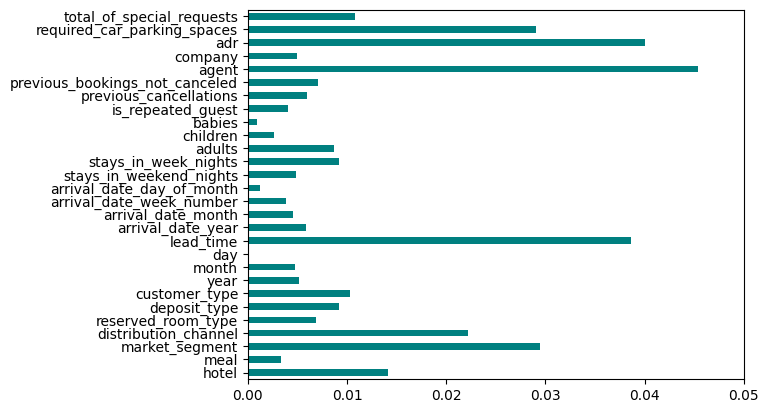

In [ ]:
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns)
feat_importances.plot(kind='barh', color = 'teal')
plt.xlim(0, 0.05)
plt.show()

In [ ]:
cols = ["required_car_parking_spaces", "agent", "lead_time", "market_segment", "adr", "distribution_channel"]
X = X[cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
#Logistic Regression
logistic_model = LogisticRegression(multi_class='ovr')

logistic_model.fit(X_train, y_train)

y_pred_lr = logistic_model.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy Score of Logistic Regression is : {acc_lr}")

clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7333726415094339
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.99      0.84     18572
           1       0.57      0.05      0.09      6868

    accuracy                           0.73     25440
   macro avg       0.66      0.52      0.47     25440
weighted avg       0.69      0.73      0.64     25440



In [ ]:
#Decision Tree
param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5],
    "random_state": [0, 1, 2, 3, 4],
    "splitter": ["best", "random"]
}

tree_classifier = DecisionTreeClassifier()
tree_model = GridSearchCV(tree_classifier, param)
tree_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'random_state': [0, 1, 2, 3, 4],
                         'splitter': ['best', 'random']})

In [ ]:
tree_model = DecisionTreeClassifier(**tree_model.best_params_)
tree_model.fit(X_train, y_train)

y_pred_dt = tree_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score of Decision Tree Regression is : {acc_dt}")

clf_report = classification_report(y_test, y_pred_dt)
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree Regression is : 0.7305424528301887
Classification Report : 
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     18572
           1       0.64      0.00      0.01      6868

    accuracy                           0.73     25440
   macro avg       0.69      0.50      0.43     25440
weighted avg       0.71      0.73      0.62     25440



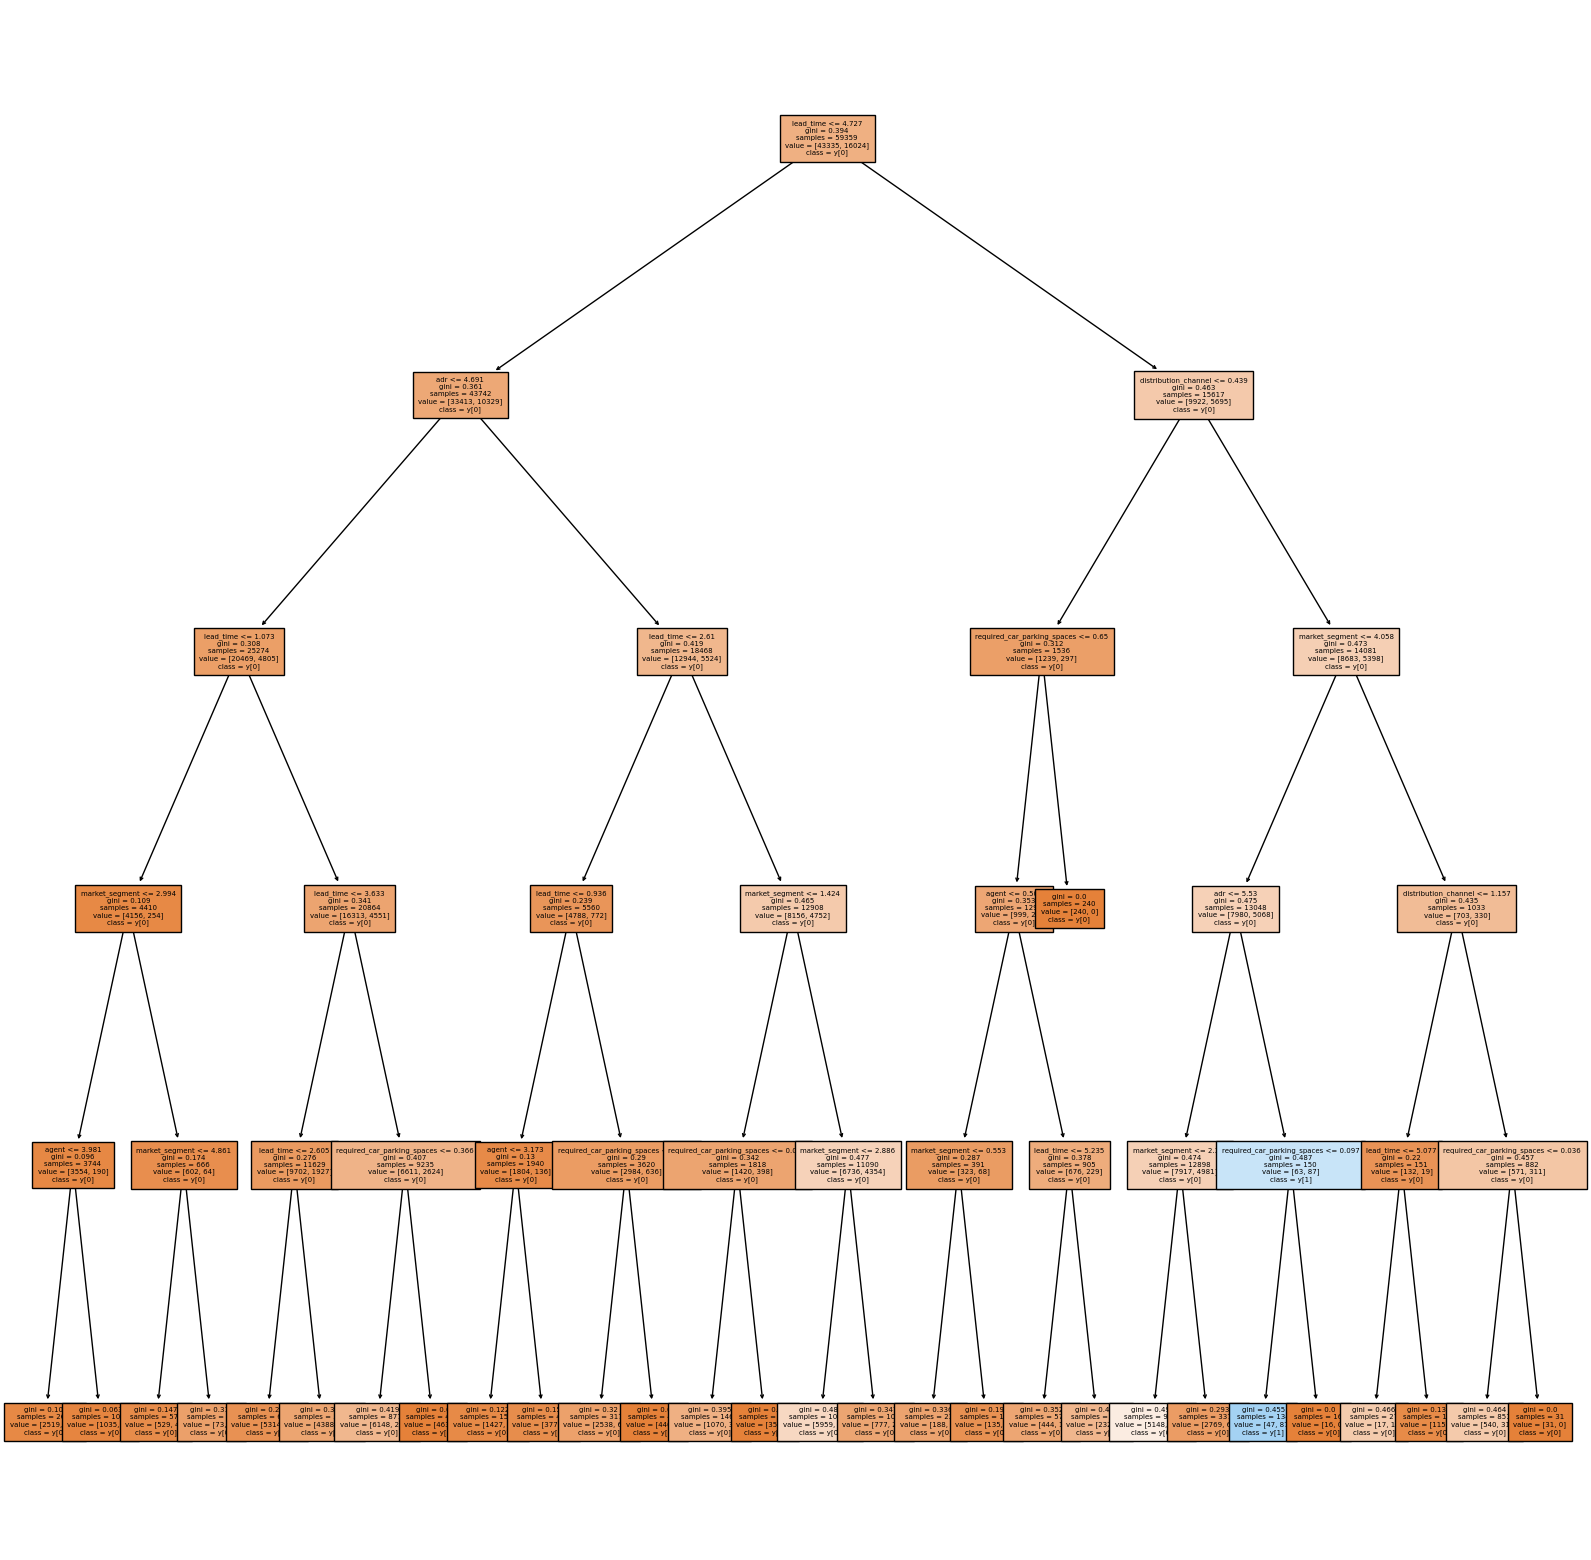

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(tree_model, fontsize=5, filled=True, feature_names=X_train.columns,label="all", class_names=True)
plt.savefig('123abcd', dpi=300)
plt.show()

In [ ]:
#Catboost
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")

clf_report = classification_report(y_test, y_pred_cat)
print(f"Classification Report : \n{clf_report}")

Learning rate set to 0.486646
0:	learn: 0.5752918	total: 53ms	remaining: 5.25s
1:	learn: 0.5343581	total: 59ms	remaining: 2.89s
2:	learn: 0.5173388	total: 64.4ms	remaining: 2.08s
3:	learn: 0.5072877	total: 69.6ms	remaining: 1.67s
4:	learn: 0.5004935	total: 74.9ms	remaining: 1.42s
5:	learn: 0.4966534	total: 80.3ms	remaining: 1.26s
6:	learn: 0.4948064	total: 85.4ms	remaining: 1.13s
7:	learn: 0.4931559	total: 91.7ms	remaining: 1.05s
8:	learn: 0.4905788	total: 97.4ms	remaining: 985ms
9:	learn: 0.4896159	total: 103ms	remaining: 926ms
10:	learn: 0.4883539	total: 108ms	remaining: 876ms
11:	learn: 0.4871882	total: 114ms	remaining: 835ms
12:	learn: 0.4862076	total: 119ms	remaining: 796ms
13:	learn: 0.4852300	total: 124ms	remaining: 765ms
14:	learn: 0.4844687	total: 130ms	remaining: 734ms
15:	learn: 0.4841448	total: 135ms	remaining: 707ms
16:	learn: 0.4839468	total: 140ms	remaining: 681ms
17:	learn: 0.4835268	total: 145ms	remaining: 659ms
18:	learn: 0.4832127	total: 152ms	remaining: 649ms
19:	le

Prediction of Data

In [ ]:
#prediction
prediction_data['Total Guests'] = prediction_data['adults'] + prediction_data['children']
prediction_data = prediction_data[prediction_data['Total Guests'] != 0]

dataNoCancel = prediction_data[prediction_data['is_canceled'] == 0]
dataNoCancel = dataNoCancel.reset_index(drop=True)

data_city = dataNoCancel[dataNoCancel["hotel"] == "City Hotel"]
data_resort = dataNoCancel[dataNoCancel["hotel"] == "Resort Hotel"]

NumberOfGuests_Weekly_city = data_city['Total Guests'].groupby(data_city['arrival_date']).sum()
NumberOfGuests_Weekly_city = NumberOfGuests_Weekly_city.resample('w').sum().to_frame()
NumberOfGuests_Weekly_city = NumberOfGuests_Weekly_city.reset_index()

NumberOfGuests_Weekly_resort = data_resort['Total Guests'].groupby(data_resort['arrival_date']).sum()
NumberOfGuests_Weekly_resort = NumberOfGuests_Weekly_resort.resample('w').sum().to_frame()
NumberOfGuests_Weekly_resort = NumberOfGuests_Weekly_resort.reset_index()

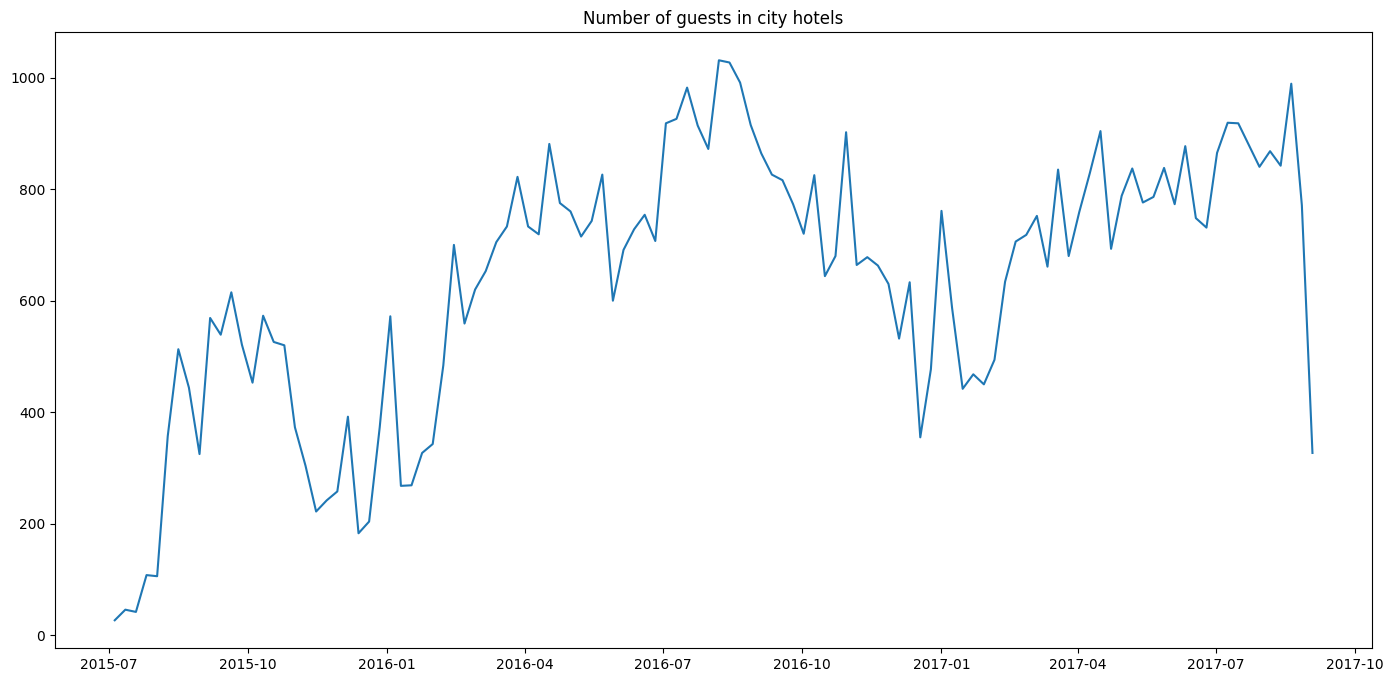

In [ ]:
#Plotting Number of guests in city hotels
plt.figure(figsize = (17, 8))
plt.plot(NumberOfGuests_Weekly_city["arrival_date"], NumberOfGuests_Weekly_city['Total Guests'], )
plt.title("Number of guests in city hotels")
plt.show()

In [ ]:
#Calculating Statistics before performing ARIMA Prediction for City Hotel
NumberOfGuests_Weekly_city.set_index("arrival_date", drop=True, inplace=True)
NumberOfGuestsValues_city = NumberOfGuests_Weekly_city.values
result = adfuller(NumberOfGuestsValues_city)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.907569
p-value: 0.044475
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


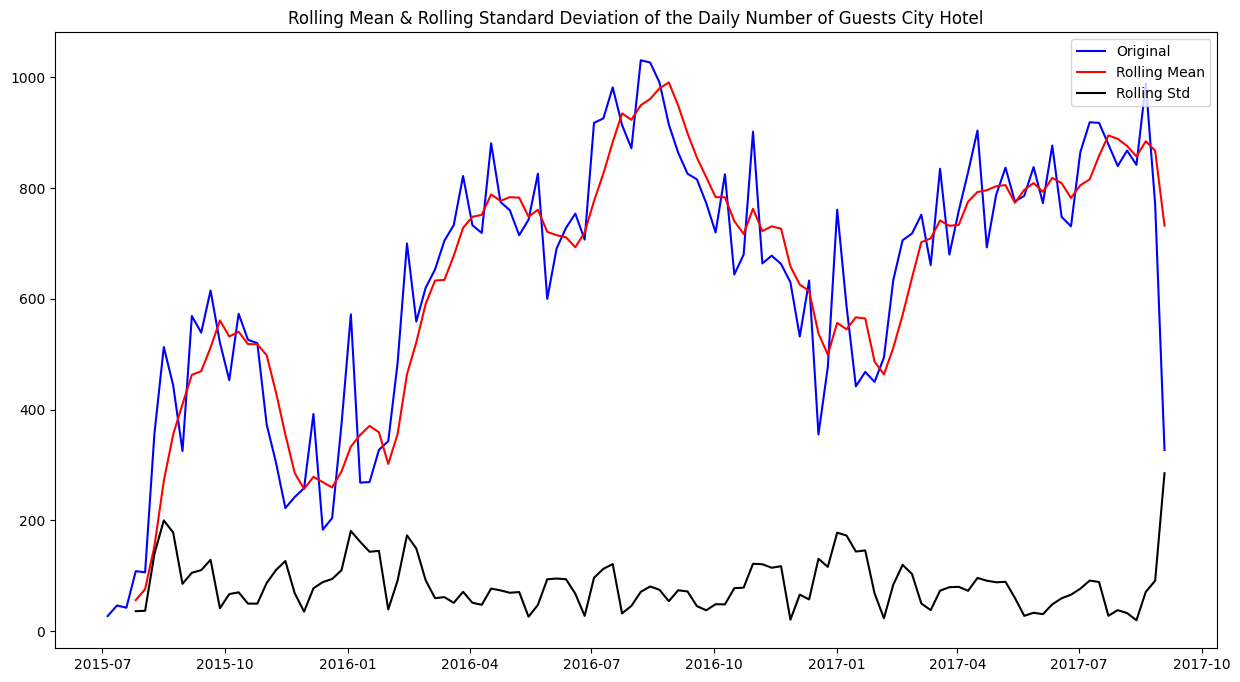

In [ ]:
#Plotting Rolling mean and standard deviation
plt.figure(figsize=(15, 8))
rolling_mean = NumberOfGuests_Weekly_city.rolling(window=4).mean()
rolling_std = NumberOfGuests_Weekly_city.rolling(window=4).std()
plt.plot(NumberOfGuests_Weekly_city, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='upper right')
plt.title('Rolling Mean & Rolling Standard Deviation of the Daily Number of Guests City Hotel')
plt.show()

In [ ]:
base = int(len(NumberOfGuests_Weekly_city)*0.7)
top = len(NumberOfGuests_Weekly_city)
train = NumberOfGuests_Weekly_city[:base]
test = NumberOfGuests_Weekly_city[base:]

In [ ]:
# Fit auto_arima function to NumberOfGuests_Daily Dataset
stepwise_fit = auto_arima(train['Total Guests'], m=12, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=946.243, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=863.676, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=947.245, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=867.113, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=863.777, Time=0.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=935.101, Time=0.24 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=864.604, Time=0.39 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=864.424, Time=0.40 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=898.849, Time=0.24 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC=866.394, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   79
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -426.334
Date:                              Thu, 30 Mar 2023   AIC                            858.668
Time:                                      06:15:49   BIC                            865.282
Sample:                                  07-05-2015   HQIC                           861.285
                                       - 01-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9157      0.070     13.047      0.000       0.778       1.053
ma.S.L12      -0.7373      0.254     -2.905      0.004      -1.235      -0.240
sigma2      1.718e+04   3999.673      4.295      0.000    9338.719     2.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   4.01   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.05   Prob(JB):                         0.29
Heteroskedasticity (H):               0.77   Skew:                            -0.45
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Performing prediction
model = ARIMA(train['Total Guests'], order=(1, 0, 0), seasonal_order=(0, 1, 1, 12))

result = model.fit()

# Prediction of the Test data
predictionsTest = result.predict(base, top-1, typ='levels').rename("Predictions")

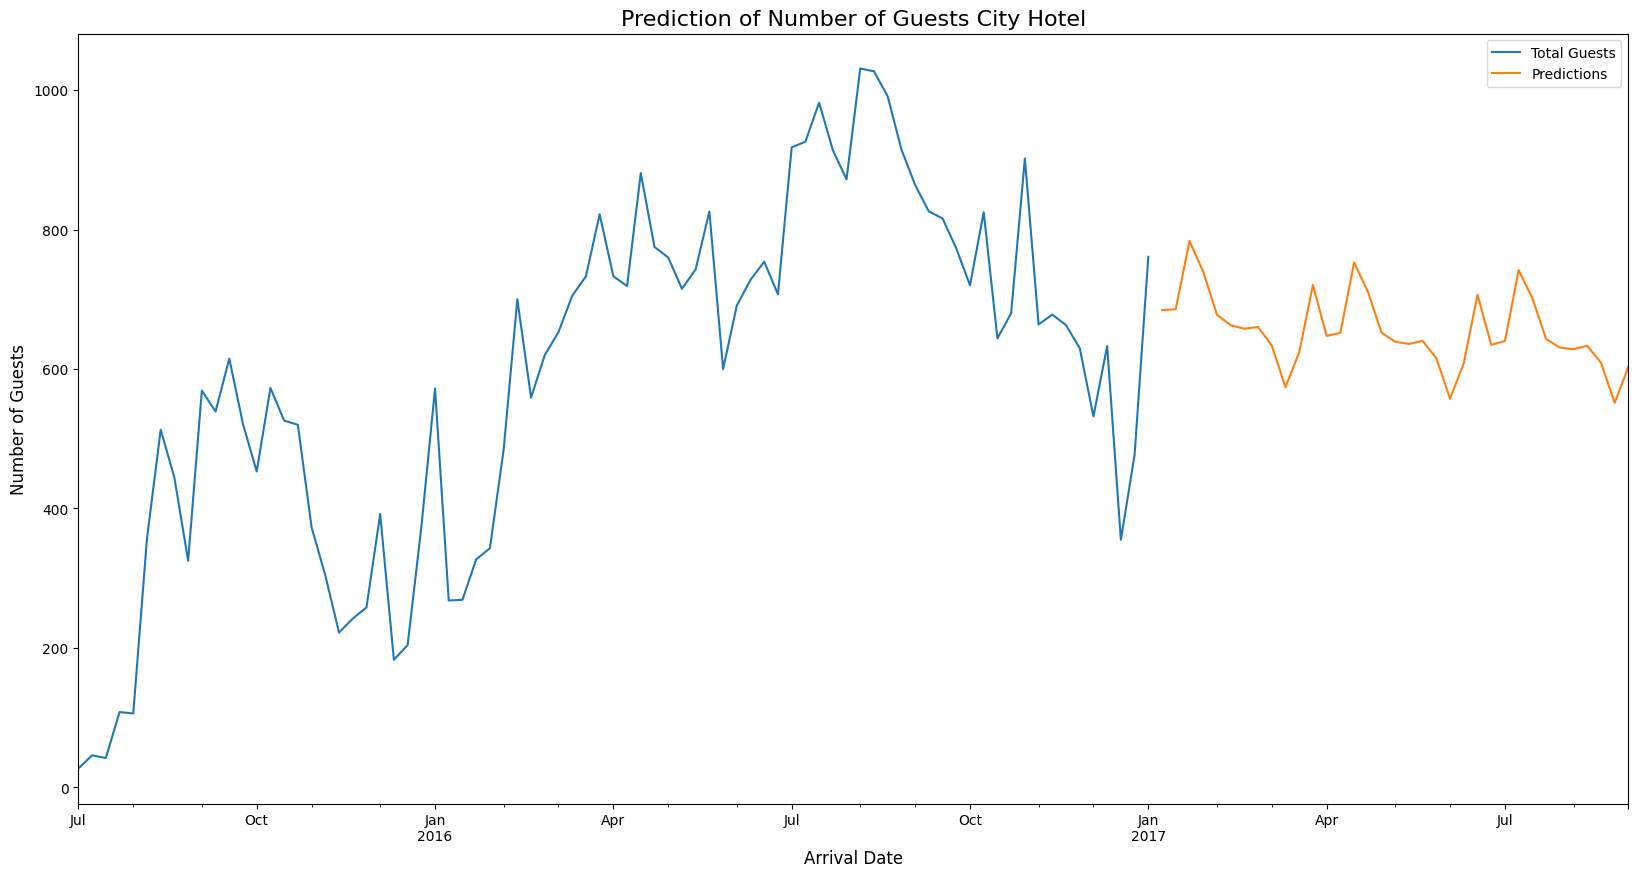

In [ ]:
#Plotting Prediction of Number of Guests City Hotel
plt.figure(figsize=(20, 10))
train["Total Guests"].plot(legend=True)
predictionsTest.plot(legend=True)
plt.title('Prediction of Number of Guests City Hotel', fontsize=16)
plt.xlabel('Arrival Date', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)
plt.show()

In [ ]:
MeanAbsPercentageErr = mean_absolute_percentage_error(test, predictionsTest)
print('Test MAPE City Hotel: %f' % MeanAbsPercentageErr)

Test MAPE City Hotel: 0.251857


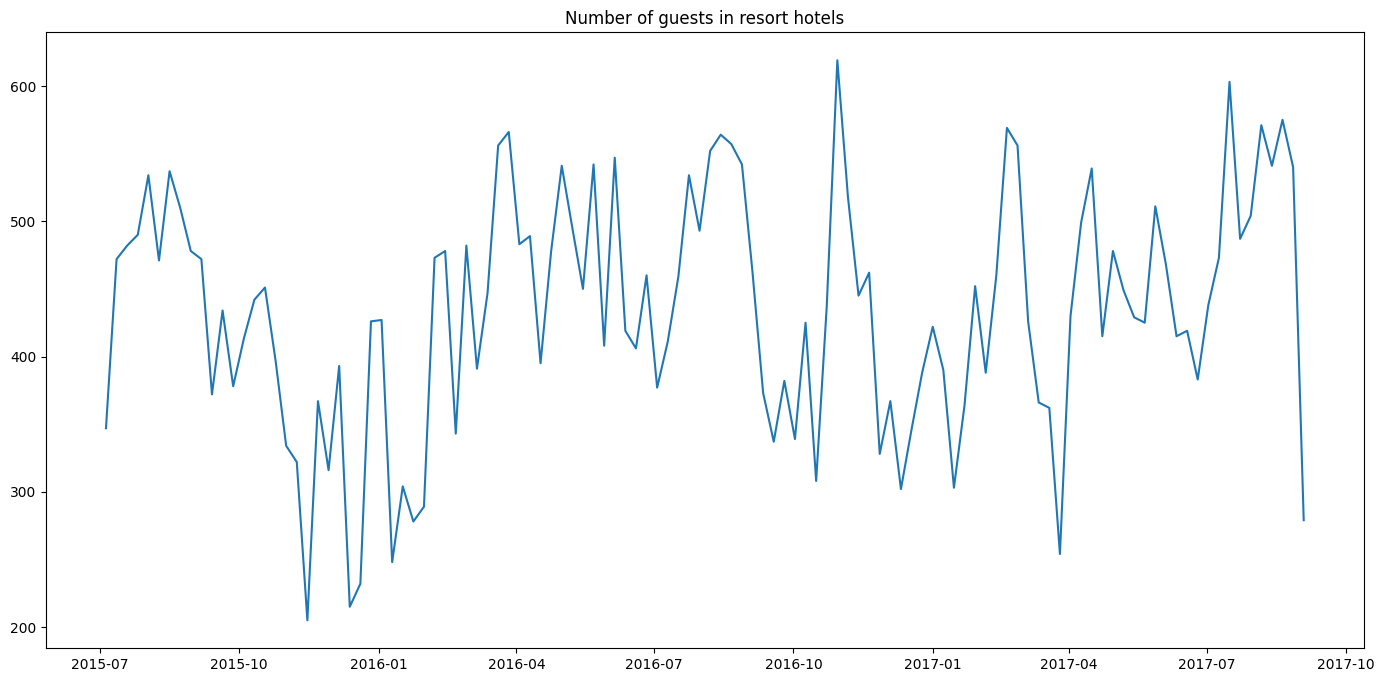

In [ ]:
#Plotting Number of guests in resort hotels
plt.figure(figsize = (17, 8))
plt.plot(NumberOfGuests_Weekly_resort["arrival_date"], NumberOfGuests_Weekly_resort['Total Guests'], )
plt.title("Number of guests in resort hotels")
plt.show()

In [ ]:
#Calculating Statistics before performing ARIMA Prediction for Resort Hotel
NumberOfGuests_Weekly_resort.set_index("arrival_date", drop=True, inplace=True)
NumberOfGuestsValues_resort = NumberOfGuests_Weekly_resort.values
result = adfuller(NumberOfGuestsValues_city)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.907569
p-value: 0.044475
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


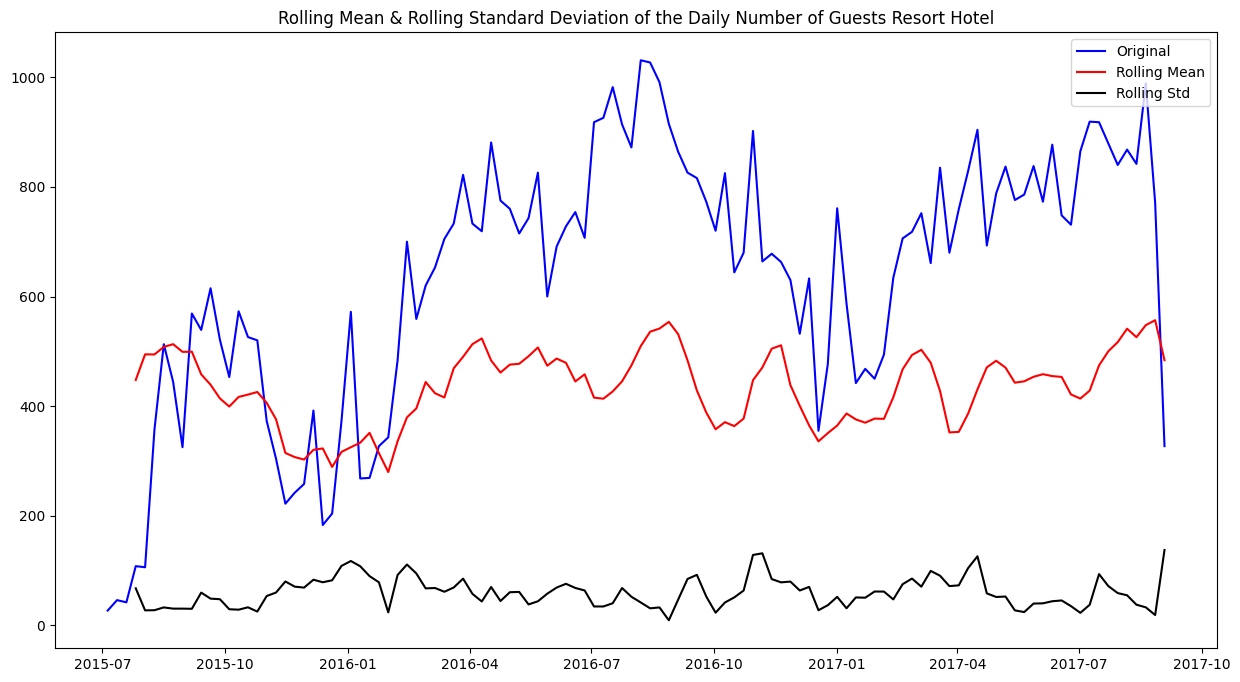

In [ ]:
#Plotting Rolling mean and standard deviation
plt.figure(figsize=(15, 8))
rolling_mean = NumberOfGuests_Weekly_resort.rolling(window=4).mean()
rolling_std = NumberOfGuests_Weekly_resort.rolling(window=4).std()
plt.plot(NumberOfGuests_Weekly_city, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='upper right')
plt.title('Rolling Mean & Rolling Standard Deviation of the Daily Number of Guests Resort Hotel')
plt.show()

In [ ]:
base = int(len(NumberOfGuests_Weekly_resort)*0.7)
top = len(NumberOfGuests_Weekly_resort)
train = NumberOfGuests_Weekly_resort[:base]
test = NumberOfGuests_Weekly_resort[base:]

In [ ]:
# Fit auto_arima function to NumberOfGuests_Daily Dataset
stepwise_fit = auto_arima(train['Total Guests'], m=12, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=833.375, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=803.227, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=805.811, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=831.837, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=807.420, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=803.050, Time=0.62 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=826.341, Time=0.46 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=802.284, Time=0.76 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=802.374, Time=0.19 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=802.025, T

In [ ]:
#Performing prediction
model = ARIMA(train['Total Guests'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 12))

result = model.fit()

# Prediction of the Test data
predictionsTest = result.predict(base, top-1, typ='levels').rename("Predictions")

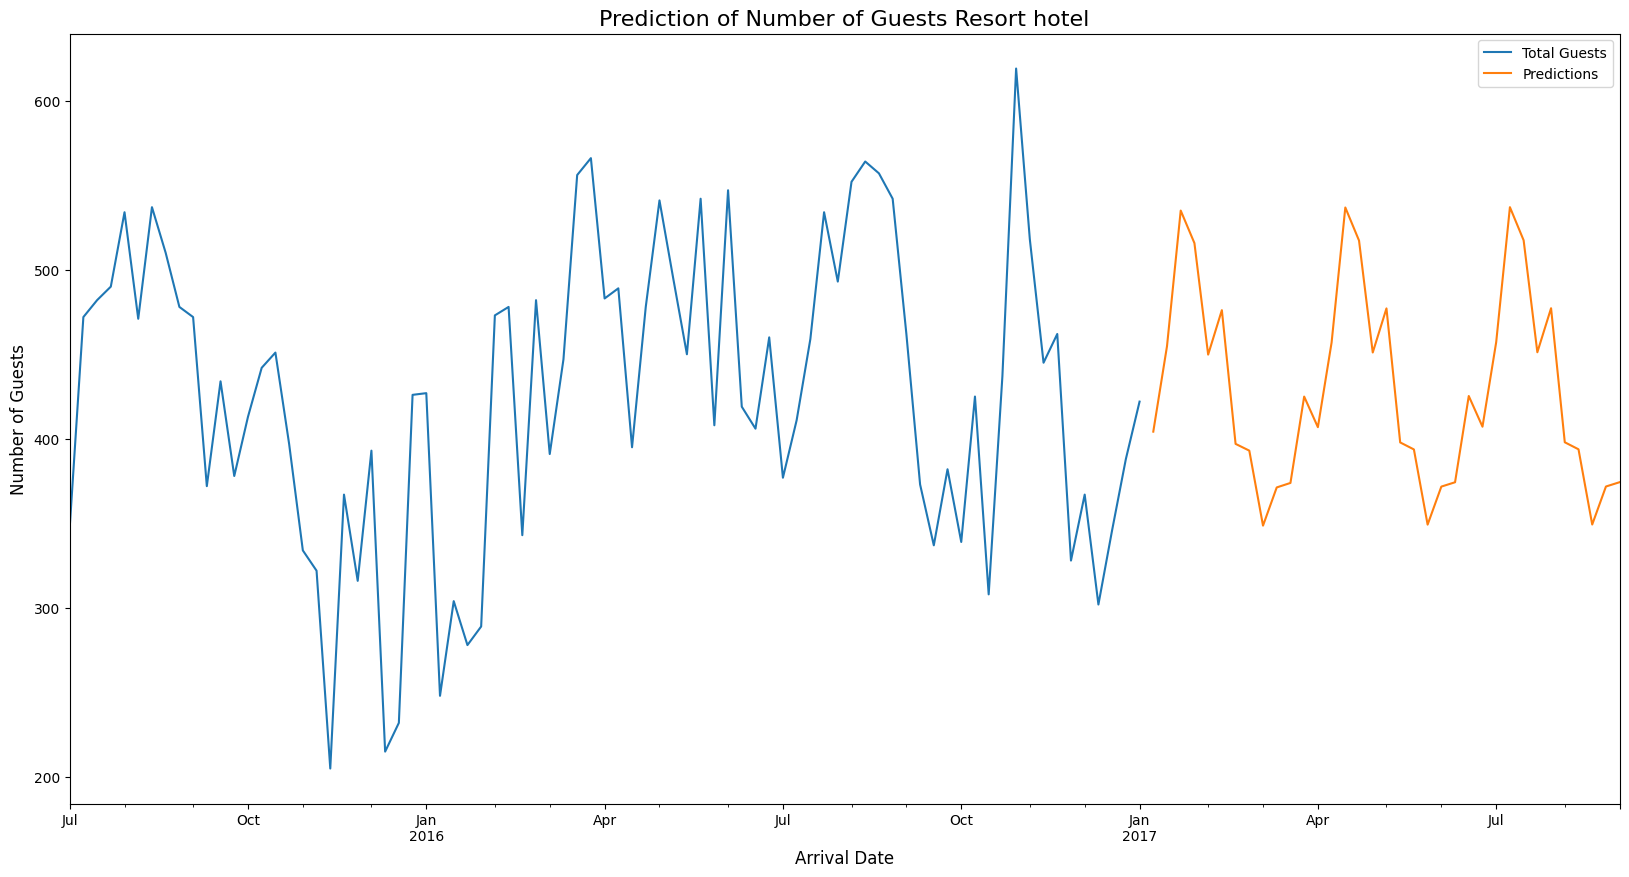

In [ ]:
#Plotting Prediction of Number of Guests Resort Hotel
plt.figure(figsize=(20, 10))
train["Total Guests"].plot(legend=True)
predictionsTest.plot(legend=True)
plt.title('Prediction of Number of Guests Resort hotel', fontsize=16)
plt.xlabel('Arrival Date', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)
plt.show()

In [ ]:
MeanAbsPercentageErr = mean_absolute_percentage_error(test, predictionsTest)
print('Test MAPE Resort Hotel: %f' % MeanAbsPercentageErr)